In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
DF = pd.read_csv('../test-result.txt',delimiter='\t', index_col=[0,1])
def to_df(colname):
    col = np.array(DF[colname])
    return pd.DataFrame(np.reshape(col,(1,col.shape[0]/1)), columns=["Pair-L","D-P-L","D-NP-L","ND-NP-L","ND-P-L","Pair-E","D-P-E","D-NP-E","ND-NP-E","ND-P-E"],index=["s1"])
time = to_df('TIME')
agg = to_df('AGG')
red = to_df('RED')
upd = to_df('UPD')


In [20]:
def plot_bar(df,main, filename = None, columns = None,  ylim = None):  
    if columns:
        ax = df[columns].plot(kind='bar',figsize=(12, 8), width = 0.7)
    else:    
        ax = df.plot(kind='bar',figsize=(12, 8), width = 0.7)
    plt.xticks(rotation=0)
    plt.xlabel('Scenario', fontsize = 14)
    if ylim:
        plt.ylim(ylim)
    plt.yscale('log')
    plt.legend(ncol = 5)
    plt.title(main, fontsize = 14)
    if filename:
        plt.savefig(filename)
def plot_all(save_to_pdf = False):
    plot_bar(time,'Execution time' , filename = 'exec.pdf' if save_to_pdf else None)
    plot_bar(agg,'Number of aggregation calls',  filename = 'agg.pdf' if save_to_pdf else None)
    plot_bar(red,'Number of reduce calls', filename = 'red.pdf' if save_to_pdf else None)
    plot_bar(upd,'Number of update calls', columns = ["Pair-E","D-P-E","D-NP-E","ND-NP-E","ND-P-E"], filename = 'upd.pdf' if save_to_pdf else None)

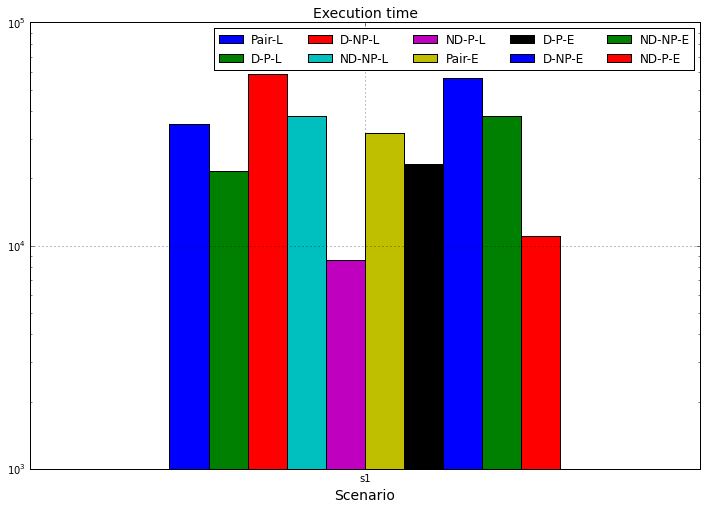

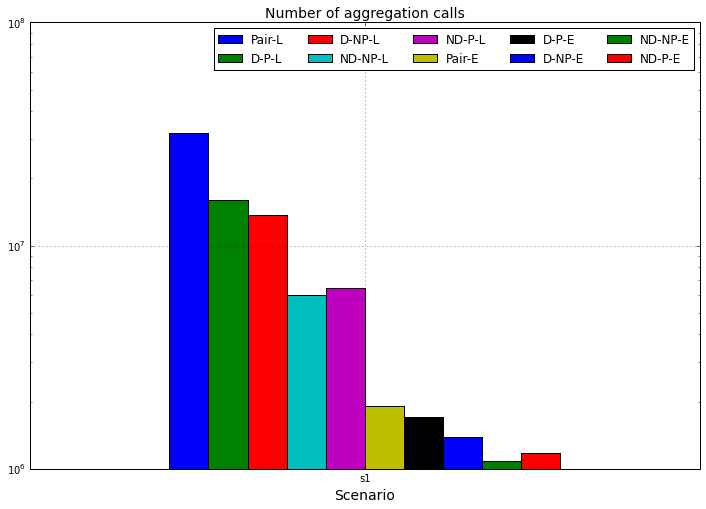

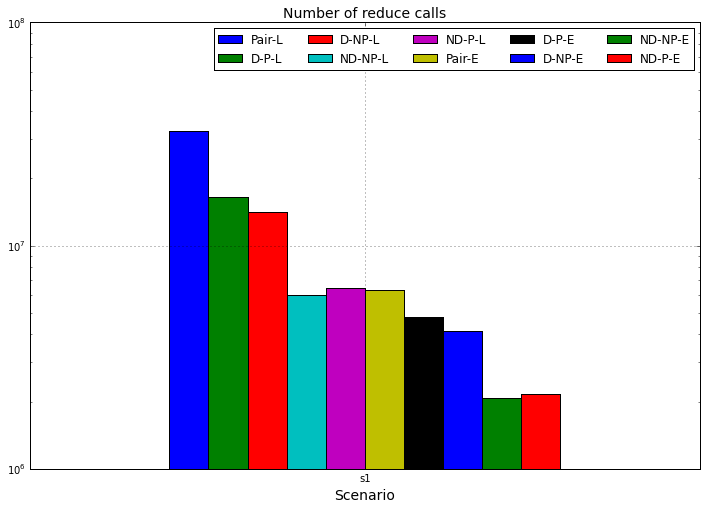

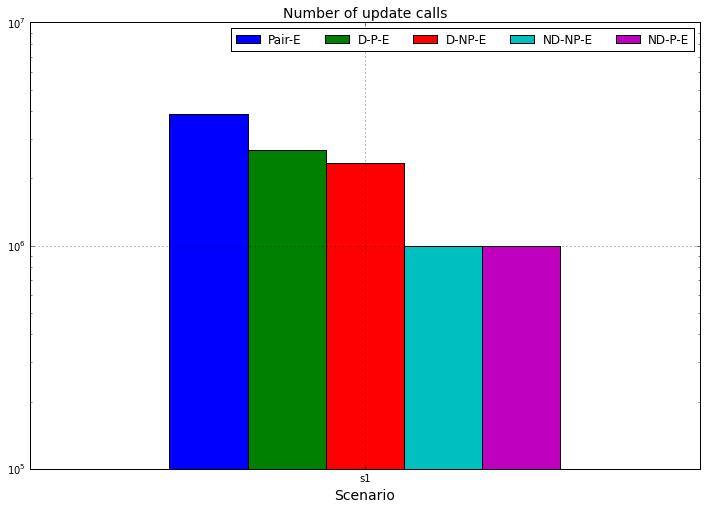

In [21]:
plot_all(True)

In [22]:
DF

TIME       AGG       RED      UPD  MAXB        AVGB
SCEN CASE                                                      
0    0     35001  32095856  32655905        0   128   42.000000
     1     21697  16084003  16507689        0    64   24.800000
     2     58896  13782466  14184449        0   128   90.686567
     3     38007   6027579   6027579        0    32   32.000000
     4      8628   6453331   6453331        0    32   32.000000
     5     32037   1903125   6342310  3879136   255   83.000000
     6     23100   1713531   4808081  2670864   127   48.600000
     7     56390   1388316   4139459  2349160   255  180.373134
     8     37938   1079600   2079515   999915    63   63.000000
     9     11038   1172032   2171947   999915    63   63.000000

In [23]:
time

,Pair-L,D-P-L,D-NP-L,ND-NP-L,ND-P-L,Pair-E,D-P-E,D-NP-E,ND-NP-E,ND-P-E
s1,35001,21697,58896,38007,8628,32037,23100,56390,37938,11038
